<a href="https://colab.research.google.com/github/PabloLeal3453/Estadistica/blob/main/Unidad5%20/Practicaclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

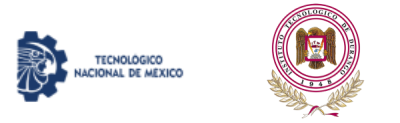
#Probabilidad y Estadistica
#Unidad 5
##Practica Extra
Facilitador: Dr.Jose Gabriel Rodriguez Rivas

Grupo: 2YY

Alumno:Pablo Gabriel Leal Nuñez

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
autos2 = pd.read_csv("autos_corregidos.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [ ]:
lm = LinearRegression()
x = autos2[["city-mpg"]]
y = autos2["price"]
x.head(10)

,city-mpg
0,21
1,21
2,19
3,24
4,18
5,19
6,19
7,19
8,17
9,23


In [ ]:
lm.fit(x, y)

LinearRegression()

In [ ]:
Ypredict = lm.predict(x)

In [ ]:
lm.intercept_

np.float64(34595.600842778265)

In [ ]:
lm.coef_

array([-849.45322454])

In [ ]:
lm.score(x, y)

0.4713797473570377

Predecir el precio de un vehiculo que tiene un rendimiento de consumo de gasolina de 24mpg

In [ ]:
Ypred = 34595.600 - 849.45 * 24

In [ ]:
Ypred

14208.799999999996

In [ ]:
consumo_de_3_vehiculos = [[24],[12],[8]]

In [ ]:
lm.predict(consumo_de_3_vehiculos)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14208.72345381, 24402.16214829, 27799.97504646])

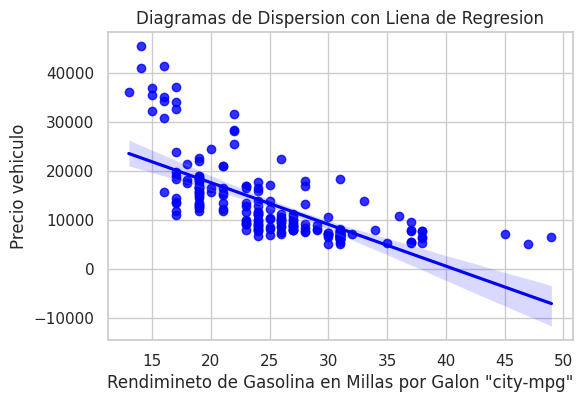

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color="blue")
plt.title('Diagramas de Dispersion con Liena de Regresion')
plt.xlabel('Rendimineto de Gasolina en Millas por Galon "city-mpg"')
plt.ylabel('Precio vehiculo')
plt.grid(True)
plt.show()

In [ ]:
autos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#Regresion lineal multiple

In [ ]:
from sklearn.model_selection import train_test_split

autos2_train, autos2_test = train_test_split(autos2, random_state=0)

In [ ]:
autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "curb-weight", "price"]].corr()

,horsepower,engine-size,city-mpg,wheel-base,curb-weight,price
horsepower,1.000000,0.822668,-0.822192,0.371178,0.757981,0.809607
engine-size,0.822668,1.000000,-0.650546,0.572027,0.849072,0.872335
city-mpg,-0.822192,-0.650546,1.000000,-0.470606,-0.749543,-0.686571
wheel-base,0.371178,0.572027,-0.470606,1.000000,0.782097,0.584642
curb-weight,0.757981,0.849072,-0.749543,0.782097,1.000000,0.834415
price,0.809607,0.872335,-0.686571,0.584642,0.834415,1.000000


In [ ]:
X_autos2_train = autos2_train[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]

y_autos2_train = autos2_train[["price"]]

In [ ]:
X_autos2_test = autos2_test[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]
y_autos2_test = autos2_test[["price"]]

In [ ]:
lm.fit(X_autos2_train, y_autos2_train)

LinearRegression()

In [ ]:
lm.coef_

array([[   55.87951468,    87.75631659,   -71.38957243,   318.47013286,
        -2035.30729795]])

In [ ]:
lm.intercept_

array([-26894.33570544])

In [ ]:
lm.score(X_autos2_train, y_autos2_train)

0.7914372491008562

#Fase de prueba

In [ ]:
yhat = lm.predict(X_autos2_test)

In [ ]:
lm.score(X_autos2_test, y_autos2_test)

0.7991381308637932

#Evaluar el modelo usando cisualizacion(graficos)

<ipython-input-35-1ba0270c8529>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_autos2_test["price"], hist=False, color="r")
<ipython-input-35-1ba0270c8529>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(yhat, hist=False, color="b", ax=ax1)


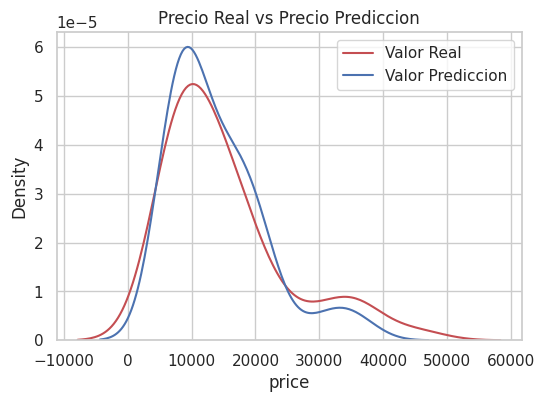

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))

ax1 = sns.distplot(y_autos2_test["price"], hist=False, color="r")
ax1 = sns.distplot(yhat, hist=False, color="b", ax=ax1)

plt.title("Precio Real vs Precio Prediccion")
ax1.legend(labels=["Valor Real", "Valor Prediccion"])
plt.show()
plt.close()

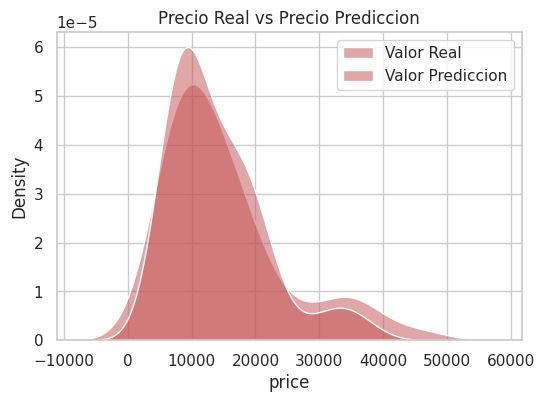

In [ ]:
plt.figure(figsize=(6, 4))
ax1 = sns.kdeplot(y_autos2_test["price"], multiple="stack", alpha = 0.5, color="r")
ax1 = sns.kdeplot(pd.Series(yhat.flatten()), multiple="stack", alpha = 0.5, color="r")

plt.title("Precio Real vs Precio Prediccion")
ax1.legend(labels=["Valor Real", "Valor Prediccion"])
plt.show()
plt.close()